In [27]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Number of records
n = 10000

# Year from 2020 to 2025
years = np.random.choice(range(2020, 2026), size=n)

# Age from 25 to 80 (realistic distribution: more cases as age increases)
ages = np.random.normal(loc=55, scale=10, size=n).astype(int)
ages = np.clip(ages, 25, 80)

# Sex: 0 = Female, 1 = Male (roughly 50-50 distribution with slight male dominance)
sex = np.random.choice([0, 1], size=n, p=[0.45, 0.55])

# Chest pain type: 0 to 3 (categorical)
cp = np.random.choice([0, 1, 2, 3], size=n, p=[0.3, 0.2, 0.3, 0.2])

# Resting blood pressure: 90–180
trestbps = np.random.normal(loc=130, scale=15, size=n).astype(int)
trestbps = np.clip(trestbps, 90, 180)

# Cholesterol: 120–350
chol = np.random.normal(loc=240, scale=40, size=n).astype(int)
chol = np.clip(chol, 120, 350)

# Fasting blood sugar > 120 mg/dl: 0 or 1
fbs = np.random.choice([0, 1], size=n, p=[0.85, 0.15])

# Resting ECG: 0–2
restecg = np.random.choice([0, 1, 2], size=n)

# Max heart rate achieved: 90–200
thalach = np.random.normal(loc=150, scale=20, size=n).astype(int)
thalach = np.clip(thalach, 90, 200)

# Exercise induced angina: 0 or 1
exang = np.random.choice([0, 1], size=n, p=[0.7, 0.3])

# ST depression induced by exercise: 0.0–6.0
oldpeak = np.round(np.random.normal(loc=1.0, scale=1.0, size=n), 1)
oldpeak = np.clip(oldpeak, 0.0, 6.0)

# Slope: 0–2
slope = np.random.choice([0, 1, 2], size=n)

# CA: number of vessels: 0–3
ca = np.random.choice([0, 1, 2, 3], size=n, p=[0.6, 0.2, 0.15, 0.05])

# Thal: 0 = normal; 1 = fixed defect; 2 = reversible defect
thal = np.random.choice([0, 1, 2], size=n, p=[0.6, 0.2, 0.2])

# BMI: 18–40
bmi = np.round(np.random.normal(loc=27, scale=4, size=n), 1)
bmi = np.clip(bmi, 18, 40)

# Smoking: 0 = no, 1 = yes
smoking = np.random.choice([0, 1], size=n, p=[0.65, 0.35])

# Alcohol intake: 0 = none, 1 = moderate, 2 = heavy
alcohol_intake = np.random.choice([0, 1, 2], size=n, p=[0.4, 0.45, 0.15])

# Physical activity: 0 = sedentary, 1 = moderate, 2 = active
physical_activity = np.random.choice([0, 1, 2], size=n, p=[0.4, 0.4, 0.2])

# Family history of heart disease
family_history = np.random.choice([0, 1], size=n, p=[0.6, 0.4])

# Diabetes
diabetes = np.random.choice([0, 1], size=n, p=[0.85, 0.15])

# Target: Heart disease risk (we'll use a rule-based score system + noise)
risk_score = (
    (ages > 50).astype(int) +
    (trestbps > 140).astype(int) +
    (chol > 250).astype(int) +
    (thalach < 130).astype(int) +
    exang +
    (oldpeak > 2).astype(int) +
    (bmi > 30).astype(int) +
    smoking +
    diabetes +
    family_history
)

# Normalize risk_score and threshold
heart_disease = (risk_score + np.random.normal(0, 1, n)) > 4
heart_disease = heart_disease.astype(int)

# Compile into DataFrame
df = pd.DataFrame({
    "age": ages,
    "sex": sex,
    "cp": cp,
    "trestbps": trestbps,
    "chol": chol,
    "fbs": fbs,
    "restecg": restecg,
    "thalach": thalach,
    "exang": exang,
    "oldpeak": oldpeak,
    "slope": slope,
    "ca": ca,
    "thal": thal,
    "bmi": bmi,
    "smoking": smoking,
    "alcohol_intake": alcohol_intake,
    "physical_activity": physical_activity,
    "family_history": family_history,
    "diabetes": diabetes,
    "year": years,
    "heart_disease": heart_disease
})

# Save to CSV
csv_path = r"C:\Users\yuvra\Downloads\hd2\heart_disease_2020_2025.csv"
df.to_csv(csv_path, index=False)

csv_path


'C:\\Users\\yuvra\\Downloads\\hd2\\heart_disease_2020_2025.csv'

📌 Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'bmi', 'smoking', 'alcohol_intake', 'physical_activity', 'family_history', 'diabetes', 'year', 'heart_disease']
🔍 Gender distribution:
 sex
1    5482
0    4518
Name: count, dtype: int64
🔍 Age distribution:
 age
(40, 60]    6447
(60, 80]    2750
(20, 40]     803
Name: count, dtype: int64
⚖️ scale_pos_weight = 2.6

=== ✅ MODEL EVALUATION (F1-Optimized) ===
🔹 Best Threshold (F1): 0.5006
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1445
           1       0.65      0.81      0.72       555

    accuracy                           0.82      2000
   macro avg       0.78      0.82      0.80      2000
weighted avg       0.84      0.82      0.83      2000

🔹 Confusion Matrix:
 [[1199  246]
 [ 106  449]]
🔹 ROC AUC Score: 0.8929


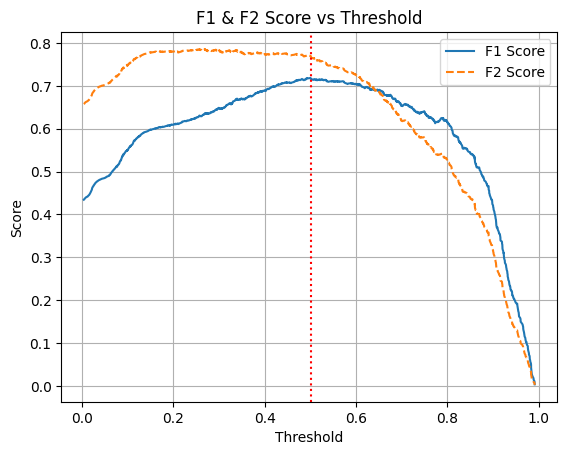


💾 Model & scaler saved successfully.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve
)
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt

# 🔹 Load data
file_path = r"C:\Users\yuvra\Downloads\hd2\heart_disease_2020_2025.csv"
df = pd.read_csv(file_path)

print("📌 Columns:", df.columns.tolist())

# 🔹 Drop unnecessary columns (like 'year')
df.drop(columns=["year"], errors="ignore", inplace=True)

# 🔹 Separate features and label
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

# 🔹 Bias-safe: Check distribution of sex and age groups (optional)
print("🔍 Gender distribution:\n", df['sex'].value_counts())
print("🔍 Age distribution:\n", pd.cut(df['age'], bins=[20, 40, 60, 80]).value_counts())

# 🔹 Train-validation split (stratified to preserve class balance)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔹 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔹 Compute class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print("⚖️ scale_pos_weight =", round(scale_pos_weight, 2))

# 🔹 Define recall/precision-optimized XGBoost model
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1,
    max_delta_step=1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='aucpr',
    random_state=42,
    use_label_encoder=False
)

# 🔹 Fit model
model.fit(X_train_scaled, y_train)

# 🔹 Predict probabilities
y_prob = model.predict_proba(X_val_scaled)[:, 1]

# 🔹 Optimize threshold for F1 and F2
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
f2_scores = (5 * precision * recall) / (4 * precision + recall + 1e-6)

best_thresh_f1 = thresholds[np.argmax(f1_scores)]
best_thresh_f2 = thresholds[np.argmax(f2_scores)]

# 🔹 Use best F1 threshold for balanced model
final_thresh = best_thresh_f1
y_pred = (y_prob >= final_thresh).astype(int)

# 🔹 Evaluate model
print("\n=== ✅ MODEL EVALUATION (F1-Optimized) ===")
print("🔹 Best Threshold (F1):", round(final_thresh, 4))
print("🔹 Classification Report:\n", classification_report(y_val, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("🔹 ROC AUC Score:", round(roc_auc_score(y_val, y_prob), 4))

# 🔹 Plot precision-recall tradeoff
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.plot(thresholds, f2_scores[:-1], label="F2 Score", linestyle='--')
plt.axvline(final_thresh, color='red', linestyle=':')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1 & F2 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Save model and scaler
joblib.dump(model, "heart_disease_model_final.pkl")
joblib.dump(scaler, "scaler_final.pkl")
print("\n💾 Model & scaler saved successfully.")


In [13]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# ✅ Load model and scaler
model = joblib.load("heart_disease_model_final.pkl")
scaler = joblib.load("scaler_final.pkl")

# ✅ Load full dataset
data_path = r"C:\Users\yuvra\Downloads\hd2\heart_disease_2020_2025.csv"
df = pd.read_csv(data_path)

# Drop 'year' and separate features
df.drop(columns=["year"], errors="ignore", inplace=True)
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']

# Scale inputs
X_scaled = scaler.transform(X)

# Predict
y_prob = model.predict_proba(X_scaled)[:, 1]
y_pred = (y_prob >= 0.5006).astype(int)  # Use your F1-optimal threshold

df['y_pred'] = y_pred
df['y_true'] = y
df['risk_score'] = y_prob

# ✅ 1. BIAS CHECK BY SEX
print("\n🔍 Bias Check by Gender (0 = Female, 1 = Male):")
for sex_val in [0, 1]:
    subset = df[df['sex'] == sex_val]
    acc = accuracy_score(subset['y_true'], subset['y_pred'])
    rec = recall_score(subset['y_true'], subset['y_pred'])
    prec = precision_score(subset['y_true'], subset['y_pred'])
    fn = ((subset['y_true'] == 1) & (subset['y_pred'] == 0)).sum()
    print(f"\nSex = {sex_val} → Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, FN: {fn}")

# ✅ 2. BIAS CHECK BY AGE GROUP
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80], labels=['20-40', '41-60', '61-80'])

print("\n🔍 Bias Check by Age Group:")
for group in df['age_group'].unique():
    subset = df[df['age_group'] == group]
    acc = accuracy_score(subset['y_true'], subset['y_pred'])
    rec = recall_score(subset['y_true'], subset['y_pred'])
    prec = precision_score(subset['y_true'], subset['y_pred'])
    fn = ((subset['y_true'] == 1) & (subset['y_pred'] == 0)).sum()
    print(f"\nAge Group {group} → Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, FN: {fn}")

# ✅ 3. SINGLE PREDICTION CHECK (Manual Input)
print("\n🎯 Manual Prediction Check:")
# Sample input for a single patient
patient_input = {
    'age': 58,
    'sex': 1,
    'cp': 2,
    'trestbps': 140,
    'chol': 220,
    'fbs': 0,
    'restecg': 1,
    'thalach': 160,
    'exang': 0,
    'oldpeak': 1.5,
    'slope': 2,
    'ca': 0,
    'thal': 2,
    'bmi': 27.5,
    'smoking': 0,
    'alcohol_intake': 0,
    'physical_activity': 1,
    'family_history': 1,
    'diabetes': 0
}

input_df = pd.DataFrame([patient_input])
input_scaled = scaler.transform(input_df)
risk_score = model.predict_proba(input_scaled)[:, 1][0]
prediction = int(risk_score >= 0.5006)

print(f"🧠 Risk Score: {risk_score:.4f}")
print(f"🔔 Prediction: {'⚠️ At Risk' if prediction == 1 else '✅ No Warning'}")



🔍 Bias Check by Gender (0 = Female, 1 = Male):

Sex = 0 → Accuracy: 0.86, Recall: 0.85, Precision: 0.70, FN: 183

Sex = 1 → Accuracy: 0.85, Recall: 0.85, Precision: 0.69, FN: 222

🔍 Bias Check by Age Group:

Age Group 20-40 → Accuracy: 0.92, Recall: 0.77, Precision: 0.72, FN: 30

Age Group 61-80 → Accuracy: 0.82, Recall: 0.88, Precision: 0.67, FN: 112

Age Group 41-60 → Accuracy: 0.86, Recall: 0.85, Precision: 0.70, FN: 263

🎯 Manual Prediction Check:
🧠 Risk Score: 0.0730
🔔 Prediction: ✅ No Warning


In [14]:
import pandas as pd
import joblib

# ✅ Load trained model and scaler
model = joblib.load("heart_disease_model_final.pkl")
scaler = joblib.load("scaler_final.pkl")

# ✅ Define a sample patient (change values as needed)
patient = {
    'age': 64,
    'sex': 1,
    'cp': 3,
    'trestbps': 140,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 1,
    'oldpeak': 1.5,
    'slope': 2,
    'ca': 0,
    'thal': 3,
    'bmi': 29.4,
    'smoking': 1,
    'alcohol_intake': 0,
    'physical_activity': 0,
    'family_history': 1,
    'diabetes': 1
}

# ✅ Convert to DataFrame
input_df = pd.DataFrame([patient])

# ✅ Scale input
input_scaled = scaler.transform(input_df)

# ✅ Get prediction probability
risk_score = model.predict_proba(input_scaled)[:, 1][0]
threshold = 0.5006
prediction = int(risk_score >= threshold)

# ✅ Output the result
print("\n=== HEART DISEASE WARNING CHECK ===")
print(f"🧠 Risk Score: {risk_score:.4f}")
print(f"🔔 Prediction: {'⚠️ Heart Disease Detected (At Risk)' if prediction == 1 else '✅ No Warning (Healthy)'}")



=== HEART DISEASE WARNING CHECK ===
🧠 Risk Score: 0.8630
🔔 Prediction: ⚠️ Heart Disease Detected (At Risk)


In [33]:
import pandas as pd
import numpy as np

# Set seed
np.random.seed(7)

# Number of records
n = 10000

# Year from 2020 to 2025
years = np.random.choice(range(2020, 2026), size=n)

# Age from 25 to 80 (more early signs in 35–55 range)
ages = np.random.normal(loc=45, scale=10, size=n).astype(int)
ages = np.clip(ages, 25, 80)

# Sex
sex = np.random.choice([0, 1], size=n, p=[0.45, 0.55])

# Resting blood pressure
trestbps = np.random.normal(loc=125, scale=12, size=n).astype(int)
trestbps = np.clip(trestbps, 90, 180)

# Cholesterol
chol = np.random.normal(loc=220, scale=30, size=n).astype(int)
chol = np.clip(chol, 130, 350)

# Fasting blood sugar
fbs = np.random.choice([0, 1], size=n, p=[0.9, 0.1])

# Max heart rate
thalach = np.random.normal(loc=160, scale=15, size=n).astype(int)
thalach = np.clip(thalach, 100, 200)

# Exercise induced angina
exang = np.random.choice([0, 1], size=n, p=[0.8, 0.2])

# ST depression
oldpeak = np.round(np.random.normal(loc=0.8, scale=0.8, size=n), 1)
oldpeak = np.clip(oldpeak, 0.0, 5.0)

# BMI
bmi = np.round(np.random.normal(loc=26, scale=3.5, size=n), 1)
bmi = np.clip(bmi, 18, 40)

# Smoking
smoking = np.random.choice([0, 1], size=n, p=[0.7, 0.3])

# Alcohol
alcohol_intake = np.random.choice([0, 1, 2], size=n, p=[0.5, 0.35, 0.15])

# Physical activity
physical_activity = np.random.choice([0, 1, 2], size=n, p=[0.4, 0.4, 0.2])

# Family history
family_history = np.random.choice([0, 1], size=n, p=[0.65, 0.35])

# Diabetes
diabetes = np.random.choice([0, 1], size=n, p=[0.88, 0.12])

# Stress level (new feature for early detection)
stress_level = np.random.choice([0, 1, 2], size=n, p=[0.4, 0.4, 0.2])  # 0 = low, 2 = high

# Sleep hours
sleep_hours = np.round(np.random.normal(loc=6.5, scale=1.0, size=n), 1)
sleep_hours = np.clip(sleep_hours, 3.5, 9.5)

# Diet score (higher is healthier)
diet_score = np.round(np.random.normal(loc=6, scale=2, size=n), 1)
diet_score = np.clip(diet_score, 1, 10)

# Risk scoring for early warning
risk_score = (
    (ages > 40).astype(int) +
    (trestbps > 135).astype(int) +
    (chol > 230).astype(int) +
    (thalach < 140).astype(int) +
    exang +
    (oldpeak > 1.5).astype(int) +
    (bmi > 28).astype(int) +
    smoking +
    diabetes +
    family_history +
    (stress_level == 2).astype(int) +
    (sleep_hours < 6).astype(int) +
    (diet_score < 4).astype(int)
)

# Determine early warning
early_hd_warning = (risk_score + np.random.normal(0, 1, n)) > 4.5
early_hd_warning = early_hd_warning.astype(int)

# Final dataset
df_early = pd.DataFrame({
    "age": ages,
    "sex": sex,
    "trestbps": trestbps,
    "chol": chol,
    "fbs": fbs,
    "thalach": thalach,
    "exang": exang,
    "oldpeak": oldpeak,
    "bmi": bmi,
    "smoking": smoking,
    "alcohol_intake": alcohol_intake,
    "physical_activity": physical_activity,
    "family_history": family_history,
    "diabetes": diabetes,
    "stress_level": stress_level,
    "sleep_hours": sleep_hours,
    "diet_score": diet_score,
    "year": years,
    "early_hd_warning": early_hd_warning
})

# Save to CSV
csv_path = r"C:\Users\yuvra\Downloads\hd2\early_heart_disease_detection_dataset.csv"
df_early.to_csv(csv_path, index=False)

csv_path


'C:\\Users\\yuvra\\Downloads\\hd2\\early_heart_disease_detection_dataset.csv'

Fitting 3 folds for each of 36 candidates, totalling 108 fits

📊 Confusion Matrix:
[[1269  223]
 [ 112  396]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1492
           1       0.64      0.78      0.70       508

    accuracy                           0.83      2000
   macro avg       0.78      0.82      0.79      2000
weighted avg       0.85      0.83      0.84      2000

🎯 ROC AUC Score: 0.9013
📌 Optimal Threshold: 0.5700

🔍 Feature Importance:


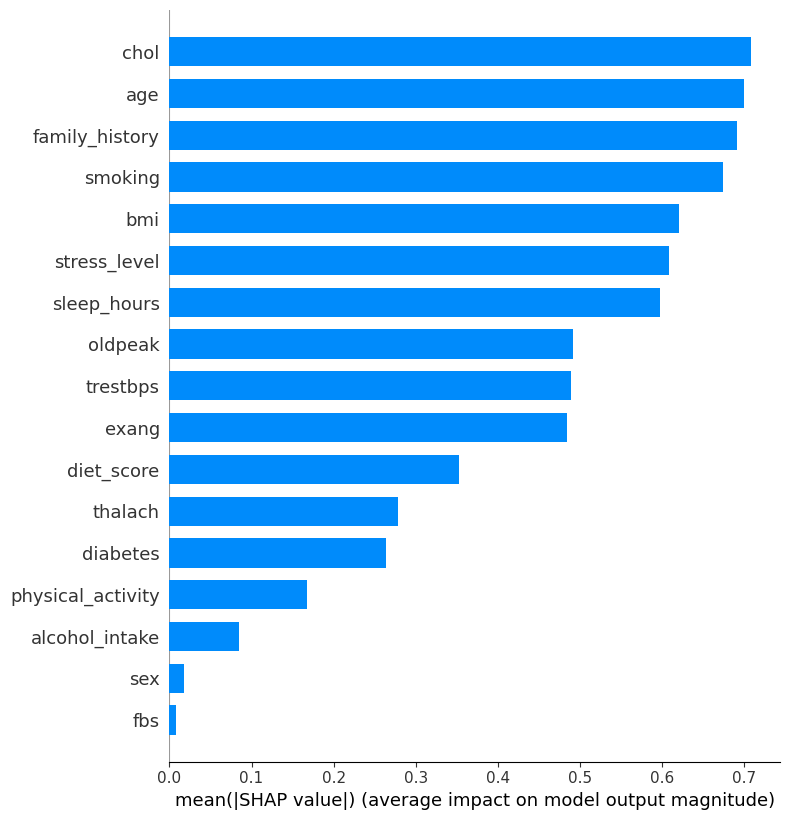

['scaler_hd.joblib']

In [20]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import shap
import joblib
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\yuvra\Downloads\hd2\early_heart_disease_detection_dataset.csv")  # Change path if needed

# Separate features and target
X = df.drop(columns=['early_hd_warning', 'year'])  # Drop target and unneeded column
y = df['early_hd_warning']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE to balance data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Set scale_pos_weight (helpful for imbalanced XGBoost)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Hyperparameter tuning
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
params = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'scale_pos_weight': [scale_pos_weight]
}
grid = GridSearchCV(xgb_model, param_grid=params, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train_res, y_train_res)

best_model = grid.best_estimator_

# Predict probabilities
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Optimal threshold tuning
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_thresh = thresholds[np.argmax(f1_scores)]

# Final predictions using best threshold
y_pred_custom = (y_prob >= best_thresh).astype(int)

# Evaluation
print(f"\n📊 Confusion Matrix:\n{confusion_matrix(y_test, y_pred_custom)}")
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_custom))
print(f"🎯 ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print(f"📌 Optimal Threshold: {best_thresh:.4f}")

# SHAP explanation
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_scaled)

print("\n🔍 Feature Importance:")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Save model & scaler
joblib.dump(best_model, "xgb_early_hd_model.joblib")
joblib.dump(scaler, "scaler_hd.joblib")


In [21]:
import joblib
import numpy as np

# Load trained model and scaler
model = joblib.load("xgb_early_hd_model.joblib")
scaler = joblib.load("scaler_hd.joblib")

# Use the threshold from training
optimal_threshold = 0.57
# Base risk-neutral profile (everything healthy)
# Test with same health features at different ages
for age in [25, 40, 60, 75]:
    profile = [age, 1, 120, 200, 0, 160, 0, 0.5, 22.0, 0,
               0, 2, 0, 0, 1, 7.0, 7.0]
    sample = np.array([profile])
    sample_scaled = scaler.transform(sample)
    prob = model.predict_proba(sample_scaled)[0][1]
    prediction = int(prob >= optimal_threshold)

    print(f"👴 Age: {age}")
    print(f"   🧠 Risk Score: {round(prob, 4)}")
    print(f"   🔔 Prediction: {'⚠️ At Risk' if prediction == 1 else '✅ No Warning'}\n")




👴 Age: 25
   🧠 Risk Score: 0.0019000000320374966
   🔔 Prediction: ✅ No Warning

👴 Age: 40
   🧠 Risk Score: 0.0020000000949949026
   🔔 Prediction: ✅ No Warning

👴 Age: 60
   🧠 Risk Score: 0.0066999997943639755
   🔔 Prediction: ✅ No Warning

👴 Age: 75
   🧠 Risk Score: 0.008700000122189522
   🔔 Prediction: ✅ No Warning



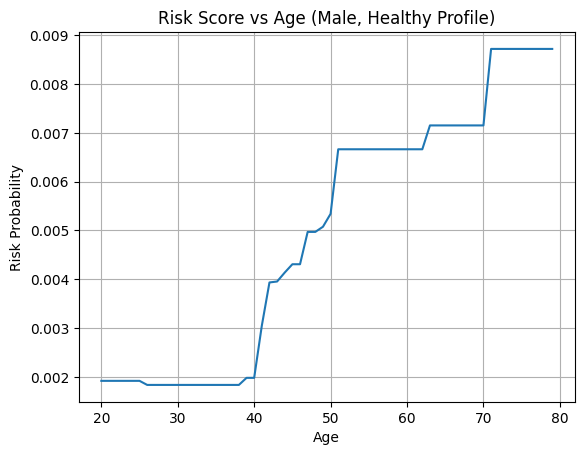

In [22]:
import matplotlib.pyplot as plt

ages = list(range(20, 80))
risks = []

for age in ages:
    profile = [age, 1, 120, 200, 0, 160, 0, 0.5, 22.0, 0,
               0, 2, 0, 0, 1, 7.0, 7.0]
    sample = np.array([profile])
    sample_scaled = scaler.transform(sample)
    risk = model.predict_proba(sample_scaled)[0][1]
    risks.append(risk)

plt.plot(ages, risks)
plt.title("Risk Score vs Age (Male, Healthy Profile)")
plt.xlabel("Age")
plt.ylabel("Risk Probability")
plt.grid(True)
plt.show()


In [19]:
import os
import joblib

# Define folder path
save_folder = r"C:\Users\yuvra\Downloads\hd2\exported_models"

# Make sure folder exists (create if it doesn't)
os.makedirs(save_folder, exist_ok=True)

# Save model and scaler in the specified folder
model_path = os.path.join(save_folder, "heart_disease_model_final.pkl")
scaler_path = os.path.join(save_folder, "scaler_final.pkl")

joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)

print(f"\n💾 Model saved at: {model_path}")
print(f"💾 Scaler saved at: {scaler_path}")



💾 Model saved at: C:\Users\yuvra\Downloads\hd2\exported_models\heart_disease_model_final.pkl
💾 Scaler saved at: C:\Users\yuvra\Downloads\hd2\exported_models\scaler_final.pkl


In [23]:
import os
import joblib

# Define the folder path where you want to save
save_folder = r"C:\Users\yuvra\Downloads\hd2\exported_models"
os.makedirs(save_folder, exist_ok=True)

# Full file paths
model_path = os.path.join(save_folder, "xgb_early_hd_model.joblib")
scaler_path = os.path.join(save_folder, "scaler_hd.joblib")

# Save model and scaler
joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)

print(f"💾 Model saved at: {model_path}")
print(f"💾 Scaler saved at: {scaler_path}")

# Optional: Open the folder automatically (Windows only)
os.startfile(save_folder)


💾 Model saved at: C:\Users\yuvra\Downloads\hd2\exported_models\xgb_early_hd_model.joblib
💾 Scaler saved at: C:\Users\yuvra\Downloads\hd2\exported_models\scaler_hd.joblib
